# Predicting Diabetes Onset

### Introduction

This project embarks on the creation of a machine learning model designed to forecast the likelihood of diabetes in patients enlisted of a Diabetes Database. The dataset comprises diverse medical predictor variables. 

### Objective

Our primary objective revolves around leveraging these features to achieve an accurate prediction of diabetes onset.

### Analysis

1. Data Exploration: Delving into the dataset's intricacies, understanding its structure, and scrutinizing the distribution of variables.
2. Data Preprocessing: Rigorous cleaning procedures, addressing missing values, and meticulous data preparation for subsequent modeling stages.
3. Exploratory Data Analysis (EDA): Unveiling insights by visually depicting relationships between variables and extracting meaningful patterns.
4. Feature Selection: Discerning the most pertinent features crucial for our predictive task.
5. Model Selection and Training: Identifying and opting for the most suitable machine learning algorithms tailored to our classification objective and training and refining the chosen models to optimize performance.
6. Model Evaluation: Rigorous assessment of model efficacy using diverse evaluation metrics.
7. Conclusion: A succinct summation encapsulating our discoveries and an evaluation of the predictive model's effectiveness.

### Data Dictionary

| Feature                     | Description                                                |
|-----------------------------|------------------------------------------------------------|
| `pregnancies`               | Number of pregnancies.                                     |
| `glucose`                   | Plasma glucose concentration after a 2-hour oral glucose tolerance test. |
| `bloodPressure`             | Diastolic blood pressure (mm Hg) measured at 2 different time points. |
| `skinThickness`             | Triceps skinfold thickness (mm).                            |
| `insulin`                   | 2-hour serum insulin (mu U/ml).                            |
| `bmi`                       | Body mass index (weight in kg/(height in m)^2).            |
| `diabetesPedigreeFunction`  | A function that quantifies diabetes history in relatives.  |
| `Age`                       | Age in years.                                              |
| `outcome`                   | Target variable; 1 if the patient has diabetes, 0 otherwise.|
| `measurement_date`            | Dates of blood pressure measurement.                        |

#### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Let's get started our PRRRRRRRRRRREDICTION!

#### Importing required libraries

In [47]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### Load the dataset

In [3]:
path = "/Users/stevenschepanski/Documents/Projects/Heart_attack_prediction/data/"

In [4]:
# Read data from the CSV files into data frames
heart = pd.read_csv(path + "heart.csv")
o2_saturation = pd.read_csv(path + "o2Saturation.csv")

### 1. Data Exploration

In [5]:
# Display the first few rows of the DataFrame using the 'head()' method
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Check the shape of the DataFrame (rows, columns)
print('The data frame has',heart.shape[0],'rows and',heart.shape[1],'columns.')

The data frame has 303 rows and 14 columns.


In [8]:
# Display a concise summary of the DataFrame'
# The 'info' method provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage
# The 'verbose=True' argument shows the full summary, including the counts of unique values in each column
heart.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


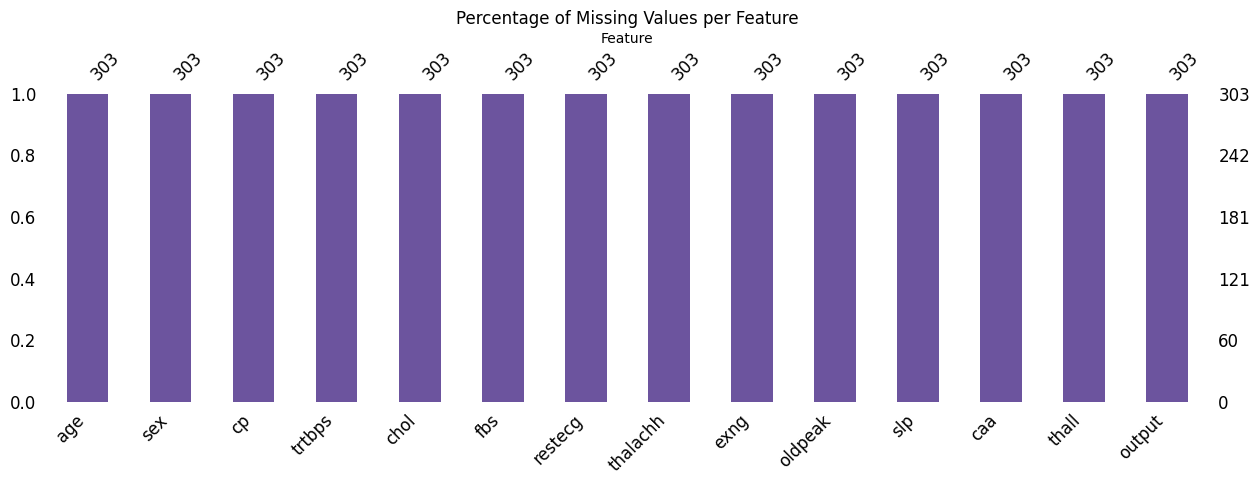

In [9]:
# custom colour
custom_colour = (108/255, 84/255, 158/255) # RGB(108, 84, 158)

# Visualize missing values using missingno
msno.bar(heart, figsize=(15, 4), color=custom_colour, fontsize=12, labels=True)

# Set plot labels and title
plt.title("Percentage of Missing Values per Feature")
plt.ylabel("Ratio of Missing Values per Feature")
plt.xlabel("Feature")

# Show the plot
plt.show()


There are no missing values in the data set which means we do not need to impute any data later on.

In [11]:
# Check for duplicate rows in the DataFrame
heart.duplicated().sum()

1

In [12]:
# Remove duplicate rows from the DataFrame
heart.drop_duplicates(inplace=True)

In [13]:
# Check for shape again
print('The data frame has',heart.shape[0],'rows and',heart.shape[1],'columns.')

The data frame has 302 rows and 14 columns.


In [14]:
# Display descriptive statistics for numerical columns in the DataFrame 'df_resized'

# The 'describe' method provides summary statistics (mean, std, min, 25%, 50%, 75%, max) for numerical columns
# The 'T' at the end transposes the result for better readability
heart.describe().T


,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


The dataset comprises 302 observations, and the dataframe displays an equal count for all features. Deduplication has been applied to ensure data consistency. Notably, features with a minimum value of 0 are considered correct, indicating meaningful zero values. Upon inspection, all ranges appear to be normal, suggesting the absence of abnormal observations in the dataset.


### 2. Data Preprocessing

The dataset exhibits no anomalies or abnormal values, with all features displaying meaningful and expected data. Given the absence of issues, it appears that comprehensive data preprocessing may not be necessary as the dataset is already in a suitable state for analysis.


### 3. Exploratory Data Analysis

In the Exploratory Data Analysis (EDA), my focus will be on examining the data distribution, investigating the correlation among features, and exploring the connection between the features and the target variable. I will commence by scrutinizing the data distribution, and subsequently, I will delve into the relationship between the target and the independent variables.

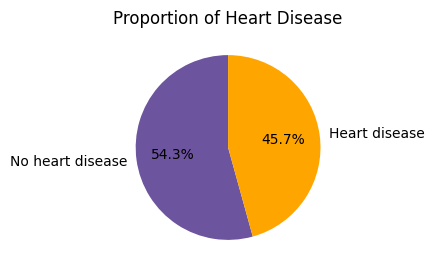

In [20]:
# Setting the figure size for the pie chart
plt.figure(figsize=(3, 3))

# Create a custom colour palette and labels
labels=['No heart disease', 'Heart disease']
colours = [custom_colour, 'orange']

# Creating a pie chart to visualize the proportion of 'outcome' values
# - df_resized['outcome'].value_counts(): Counts the occurrences of each unique value in the 'outcome' column.
# - labels=['No diabetes', 'Diabetes']: Specifies labels for the pie chart.
# - autopct='%1.1f%%': Displays the percentage on each wedge with one decimal place.
# - shadow=False: Disables shadow effect for the pie chart.
# - startangle=90: Rotates the start of the pie chart by 90 degrees.
plt.pie(heart['output'].value_counts(), labels=labels, autopct='%1.1f%%', colors=colours, shadow=False, startangle=90)

# Adding a title to the pie chart
plt.title('Proportion of Heart Disease')

# Displaying the pie chart
plt.show()


The majority of participants are not suffering from a heart disease. However, with a difference of appox. 10% between being sick and not the dataset is somewhat equal when it comes to the outcome feature.

In [ ]:
# Select specific columns from the DataFrame 'df_resized' for creating a pairplot

# Define a list of column names to be used in the pairplot
selected_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 
                    'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

# Create a pairplot using Seaborn
# The 'hue' parameter is set to 'outcome', which means the 'outcome' column will be used to color the data points
sns.pairplot(heart[selected_columns], hue='output', palette={0: custom_colour, 1: 'orange'})

# Show the pairplot
plt.show()

#### Heart attack and all other variables

In [27]:
# split features
# List of variables to plot
variables1 = ['age', 'cp', 'restecg', 'thall', 'exng', 'oldpeak']
variables2 = ['trtbps', 'chol', 'fbs', 'thalachh', 'slp', 'caa']

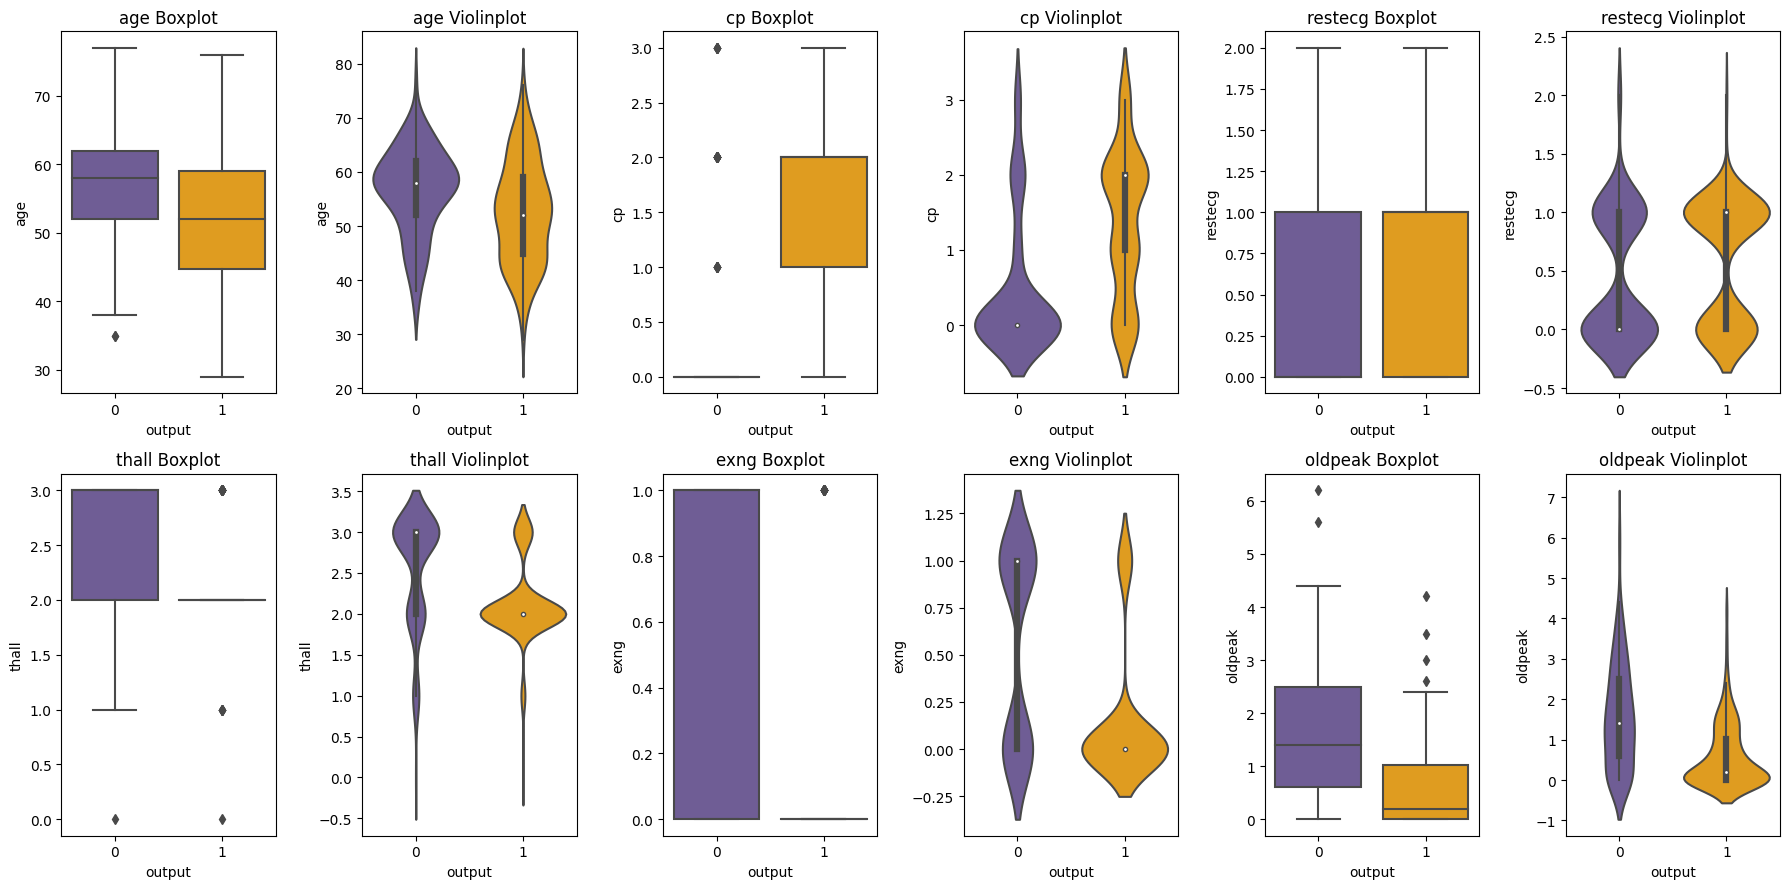

In [28]:
# Create a 3x6 grid of subplots
fig, axes = plt.subplots(2, 6, figsize=(18, 9))

# Iterate through the variables
for i, var in enumerate(variables1):
    # Calculate the row and column indices for the current variable
    row, col = divmod(i, 3)

    # Boxplot: Plot boxplot in an even-numbered column
    sns.boxplot(x='output', y=var, data=heart, ax=axes[row, col*2], palette={0: custom_colour, 1: 'orange'})
    axes[row, col*2].set_title(f'{var} Boxplot')

    # Violinplot: Plot violinplot in the next odd-numbered column
    sns.violinplot(x='output', y=var, data=heart, ax=axes[row, col*2+1], palette={0: custom_colour, 1: 'orange'})
    axes[row, col*2+1].set_title(f'{var} Violinplot')

# Remove empty subplots if there are more than available variables
max_index = min(3 * 6, len(variables1)*2 + len(variables2))
for i in range(len(variables1)*2, max_index):
    if i < len(axes.flatten()):
        fig.delaxes(axes.flatten()[i])

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


NEED TO BE A SUMMARY

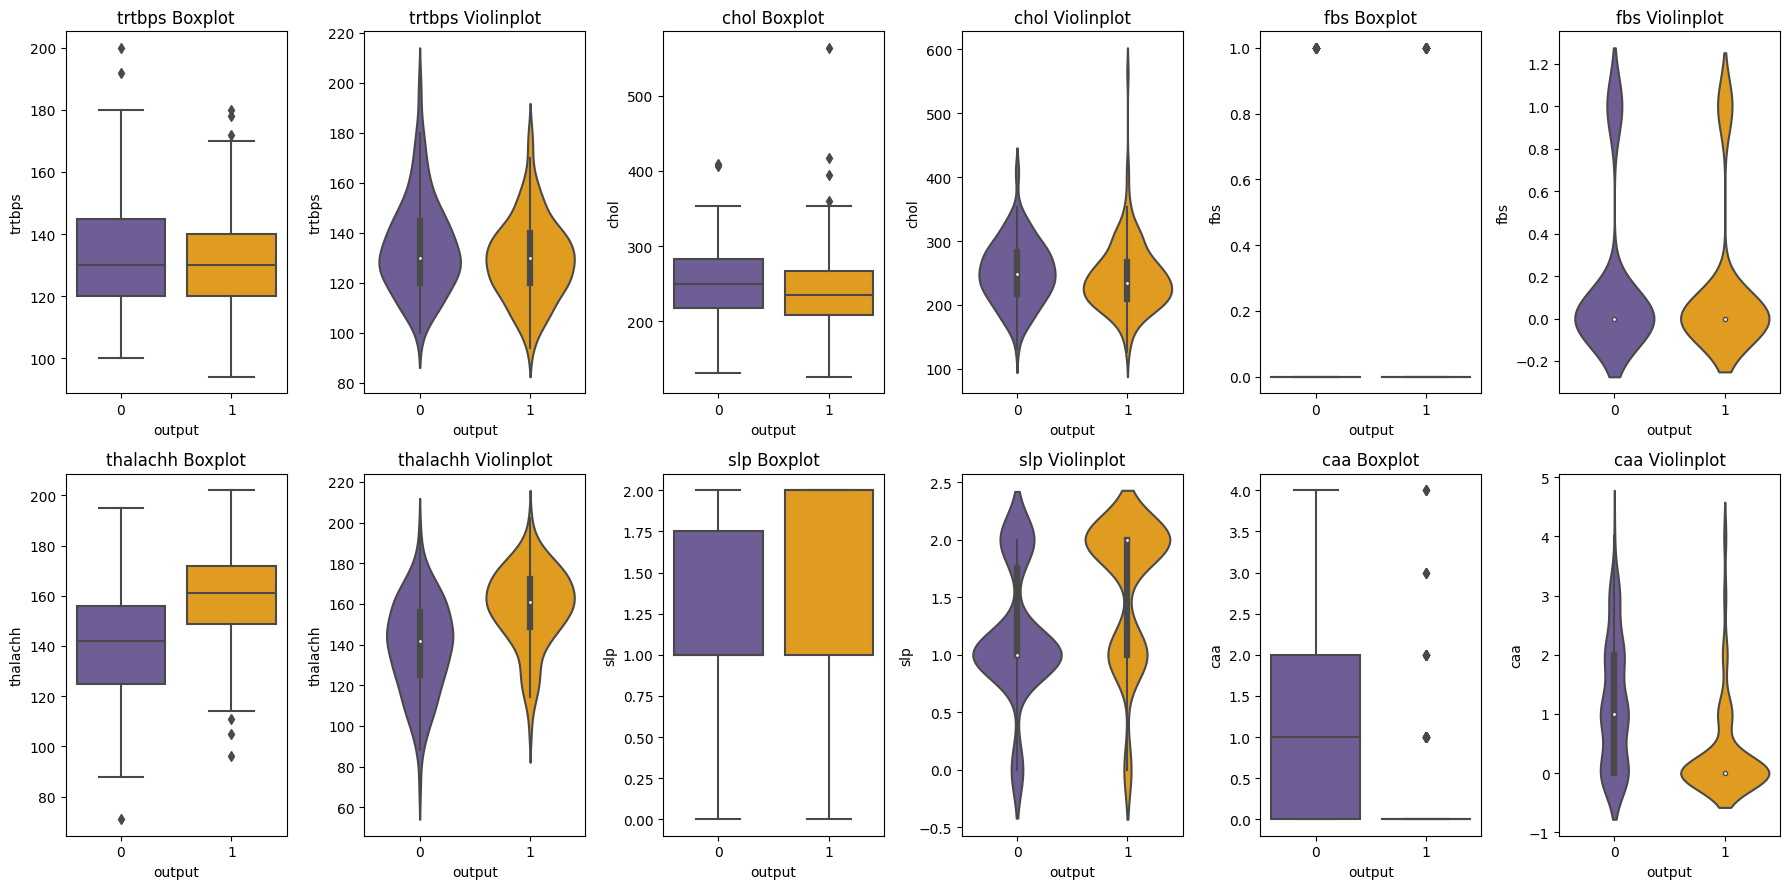

In [29]:
# Create a 3x6 grid of subplots
fig, axes = plt.subplots(2, 6, figsize=(18, 9))

# Iterate through the variables
for i, var in enumerate(variables2):
    # Calculate the row and column indices for the current variable
    row, col = divmod(i, 3)

    # Boxplot: Plot boxplot in an even-numbered column
    sns.boxplot(x='output', y=var, data=heart, ax=axes[row, col*2], palette={0: custom_colour, 1: 'orange'})
    axes[row, col*2].set_title(f'{var} Boxplot')

    # Violinplot: Plot violinplot in the next odd-numbered column
    sns.violinplot(x='output', y=var, data=heart, ax=axes[row, col*2+1], palette={0: custom_colour, 1: 'orange'})
    axes[row, col*2+1].set_title(f'{var} Violinplot')

# Remove empty subplots if there are more than available variables
max_index = min(3 * 6, len(variables1)*2 + len(variables2))
for i in range(len(variables2)*2, max_index):
    if i < len(axes.flatten()):
        fig.delaxes(axes.flatten()[i])

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

NEED TO BE A SUMMARY

boxplots show us we need some scaling in the end

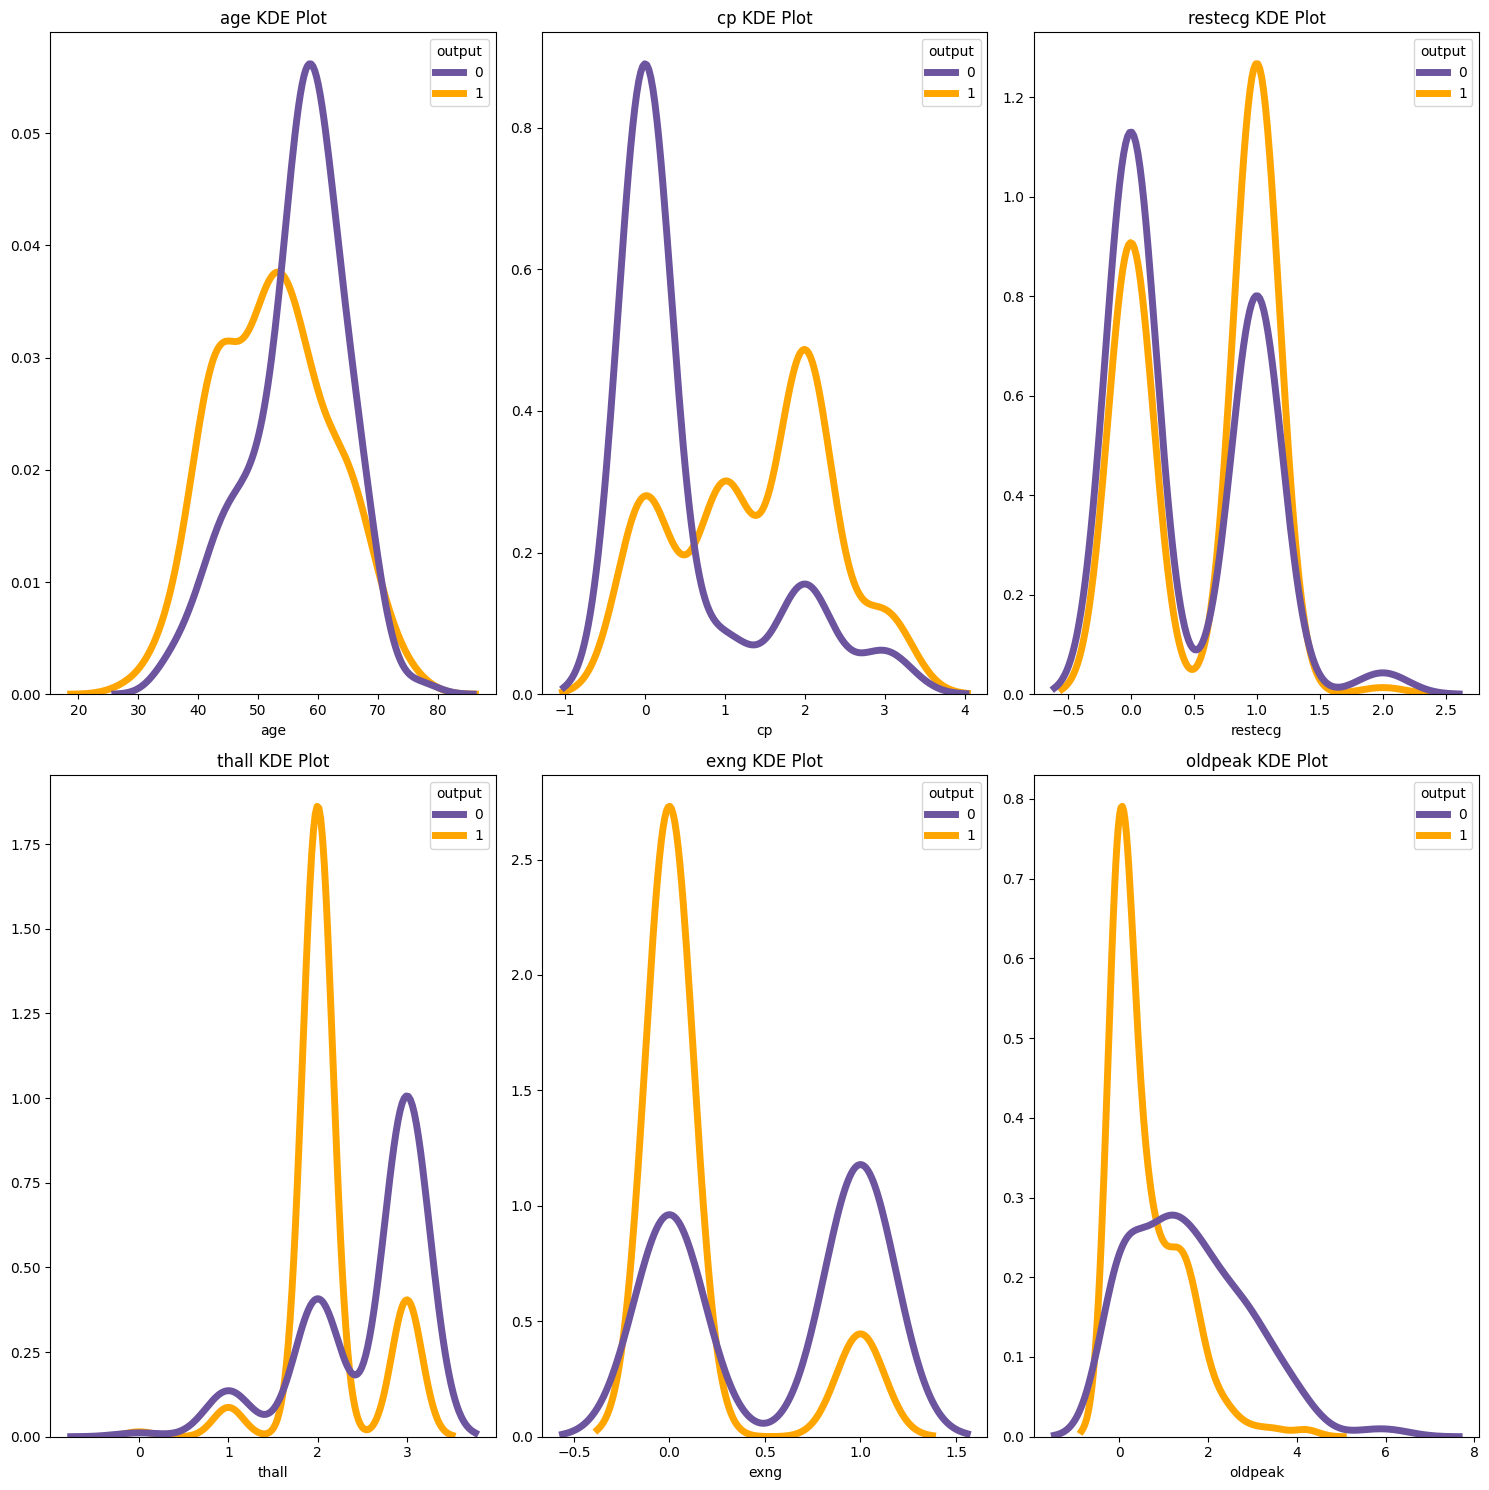

In [32]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Iterate through the variables
for i, var in enumerate(variables1):
    # Calculate the row and column indices for the current variable
    row, col = divmod(i, 3)

    # KDE plot: Plot KDE plot in the current subplot
    sns.kdeplot(x=heart[var], hue=heart['output'], common_norm=False, ax=axes[row, col], palette={0: custom_colour, 1: 'orange'}, linewidth=5)
    axes[row, col].set_title(f'{var} KDE Plot')

    # Remove y-axis label for better appearance
    axes[row, col].set_ylabel('')

# Remove empty subplots if there are more than available variables
max_index = min(3 * 6, len(variables1)*2 + len(variables2))
for i in range(len(variables1)*2, max_index):
    if i < len(axes.flatten()):
        fig.delaxes(axes.flatten()[i])

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


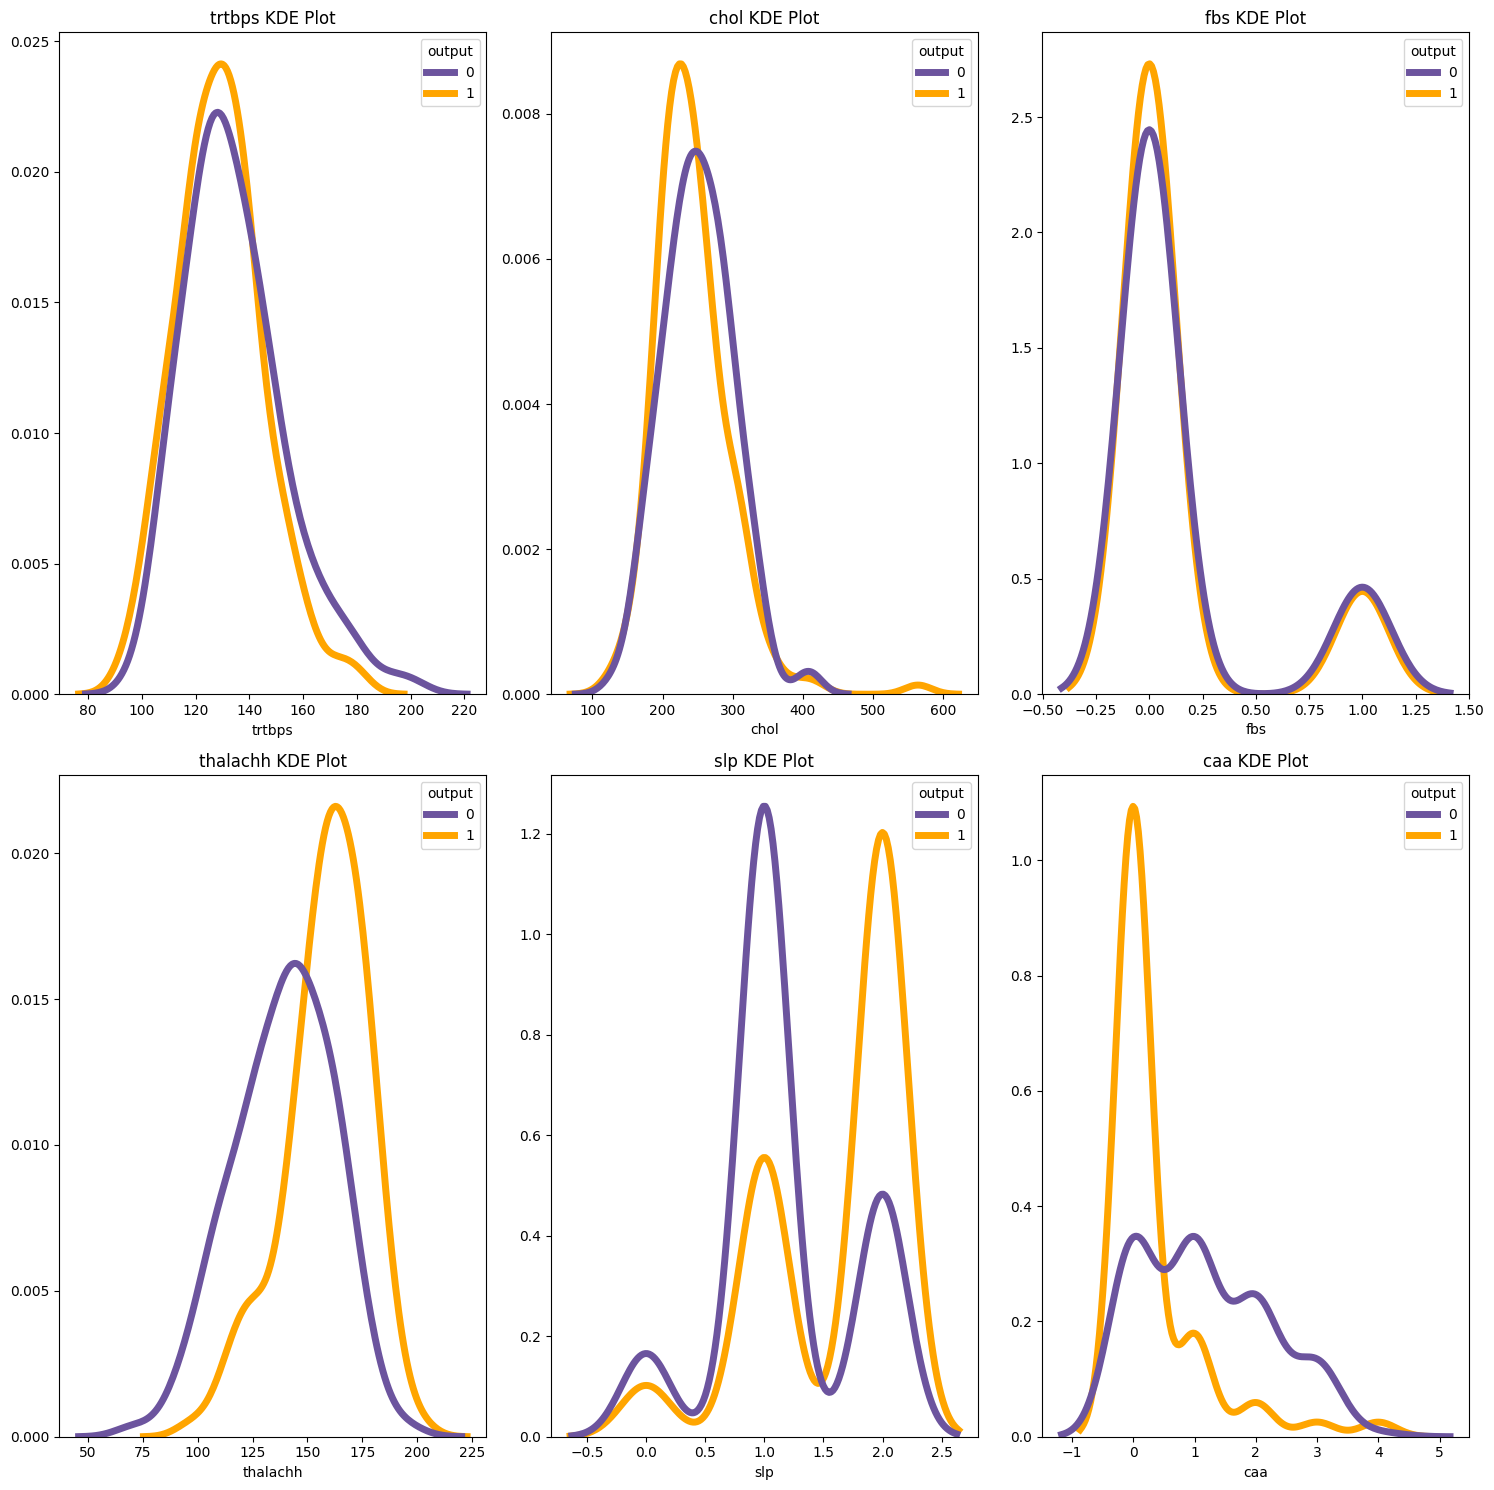

In [33]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Iterate through the variables
for i, var in enumerate(variables2):
    # Calculate the row and column indices for the current variable
    row, col = divmod(i, 3)

    # KDE plot: Plot KDE plot in the current subplot
    sns.kdeplot(x=heart[var], hue=heart['output'], common_norm=False, ax=axes[row, col], palette={0: custom_colour, 1: 'orange'}, linewidth=5)
    axes[row, col].set_title(f'{var} KDE Plot')

    # Remove y-axis label for better appearance
    axes[row, col].set_ylabel('')

# Remove empty subplots if there are more than available variables
max_index = min(3 * 6, len(variables1)*2 + len(variables2))
for i in range(len(variables2)*2, max_index):
    if i < len(axes.flatten()):
        fig.delaxes(axes.flatten()[i])

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


SUMMARY

Pair plots variables 1

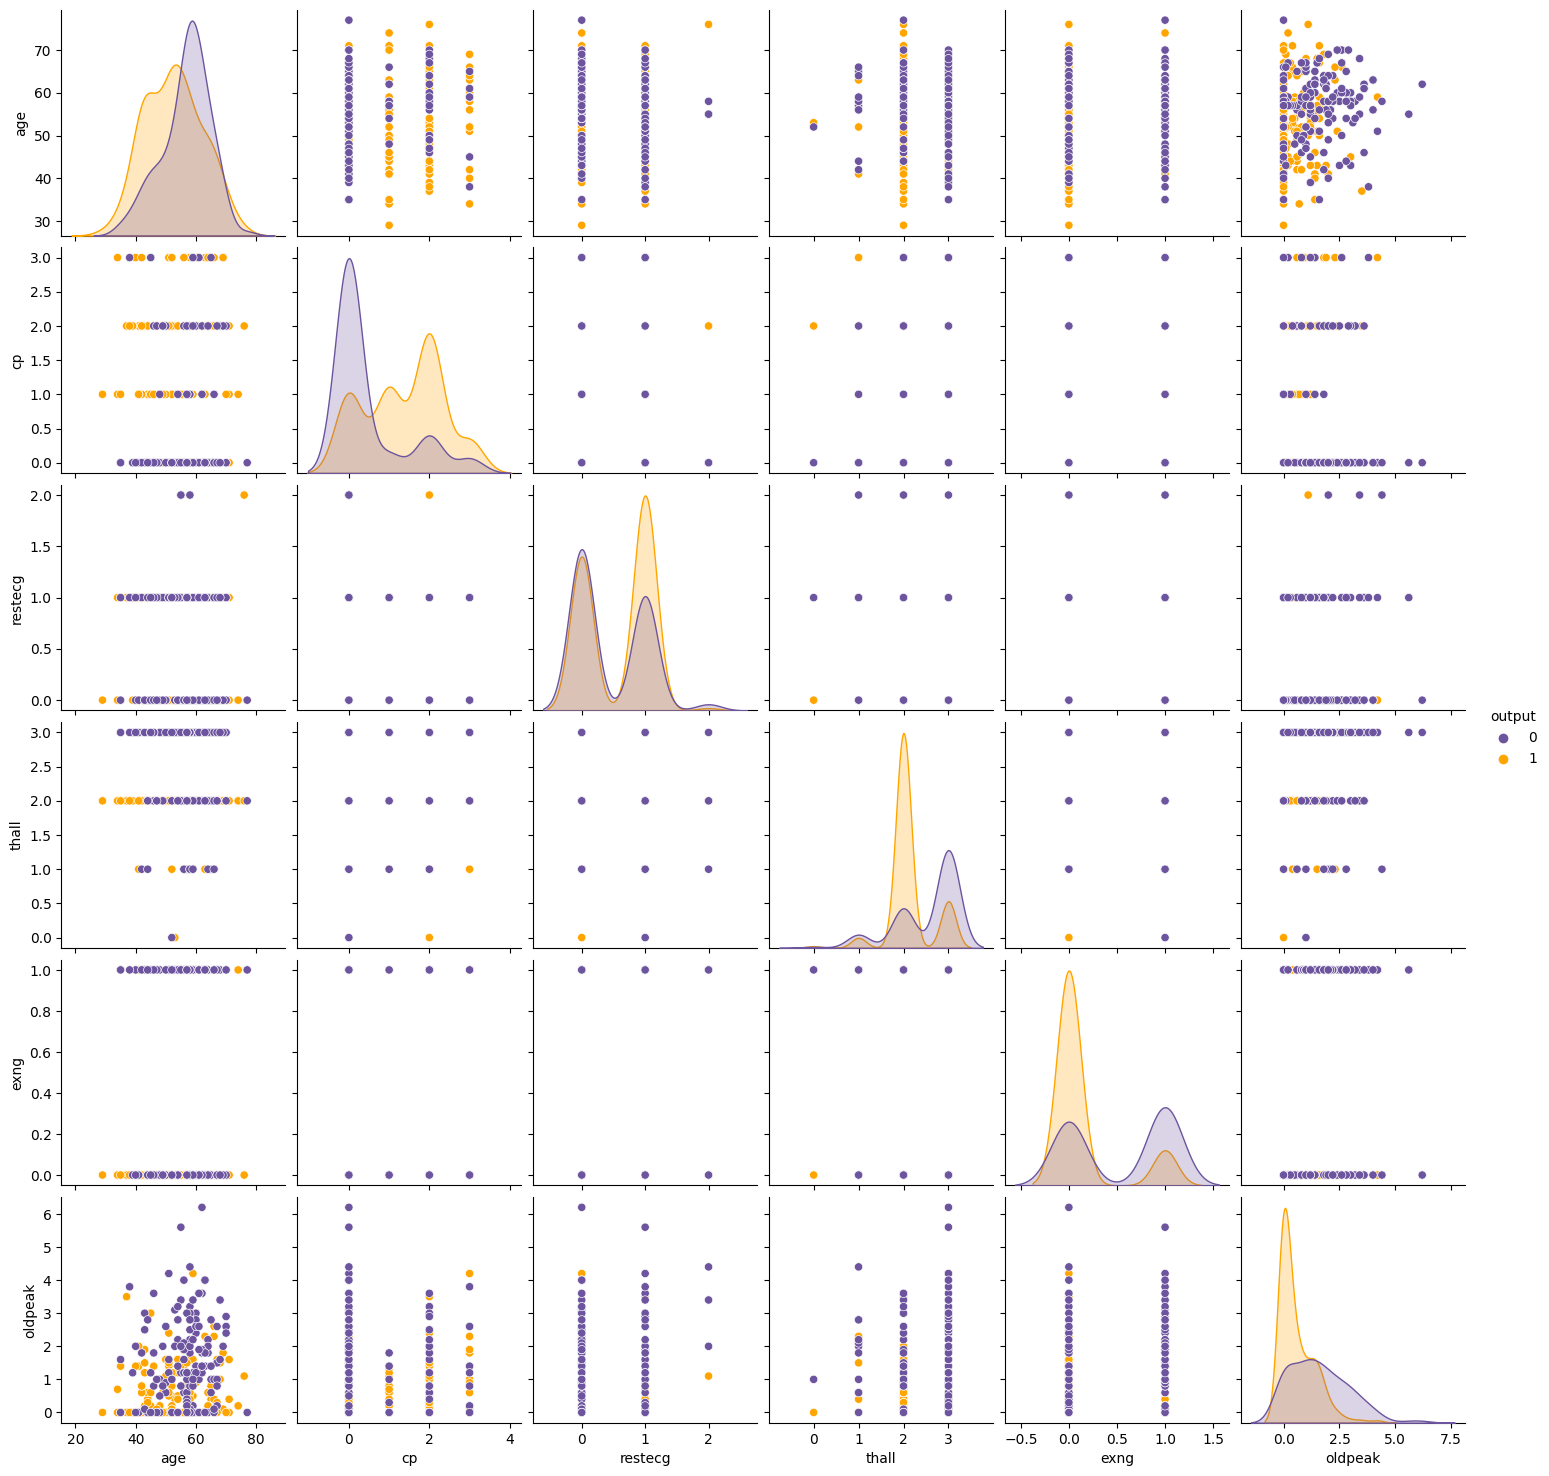

In [34]:
# Create a pairplot using Seaborn with specified variables1
# The 'hue' parameter is set to 'output', which means the 'output' column will be used to color the data points
sns.pairplot(heart[variables1 + ['output']], hue='output', palette={0: custom_colour, 1: 'orange'})

# Show the pairplot
plt.show()

Pair plots variables 1

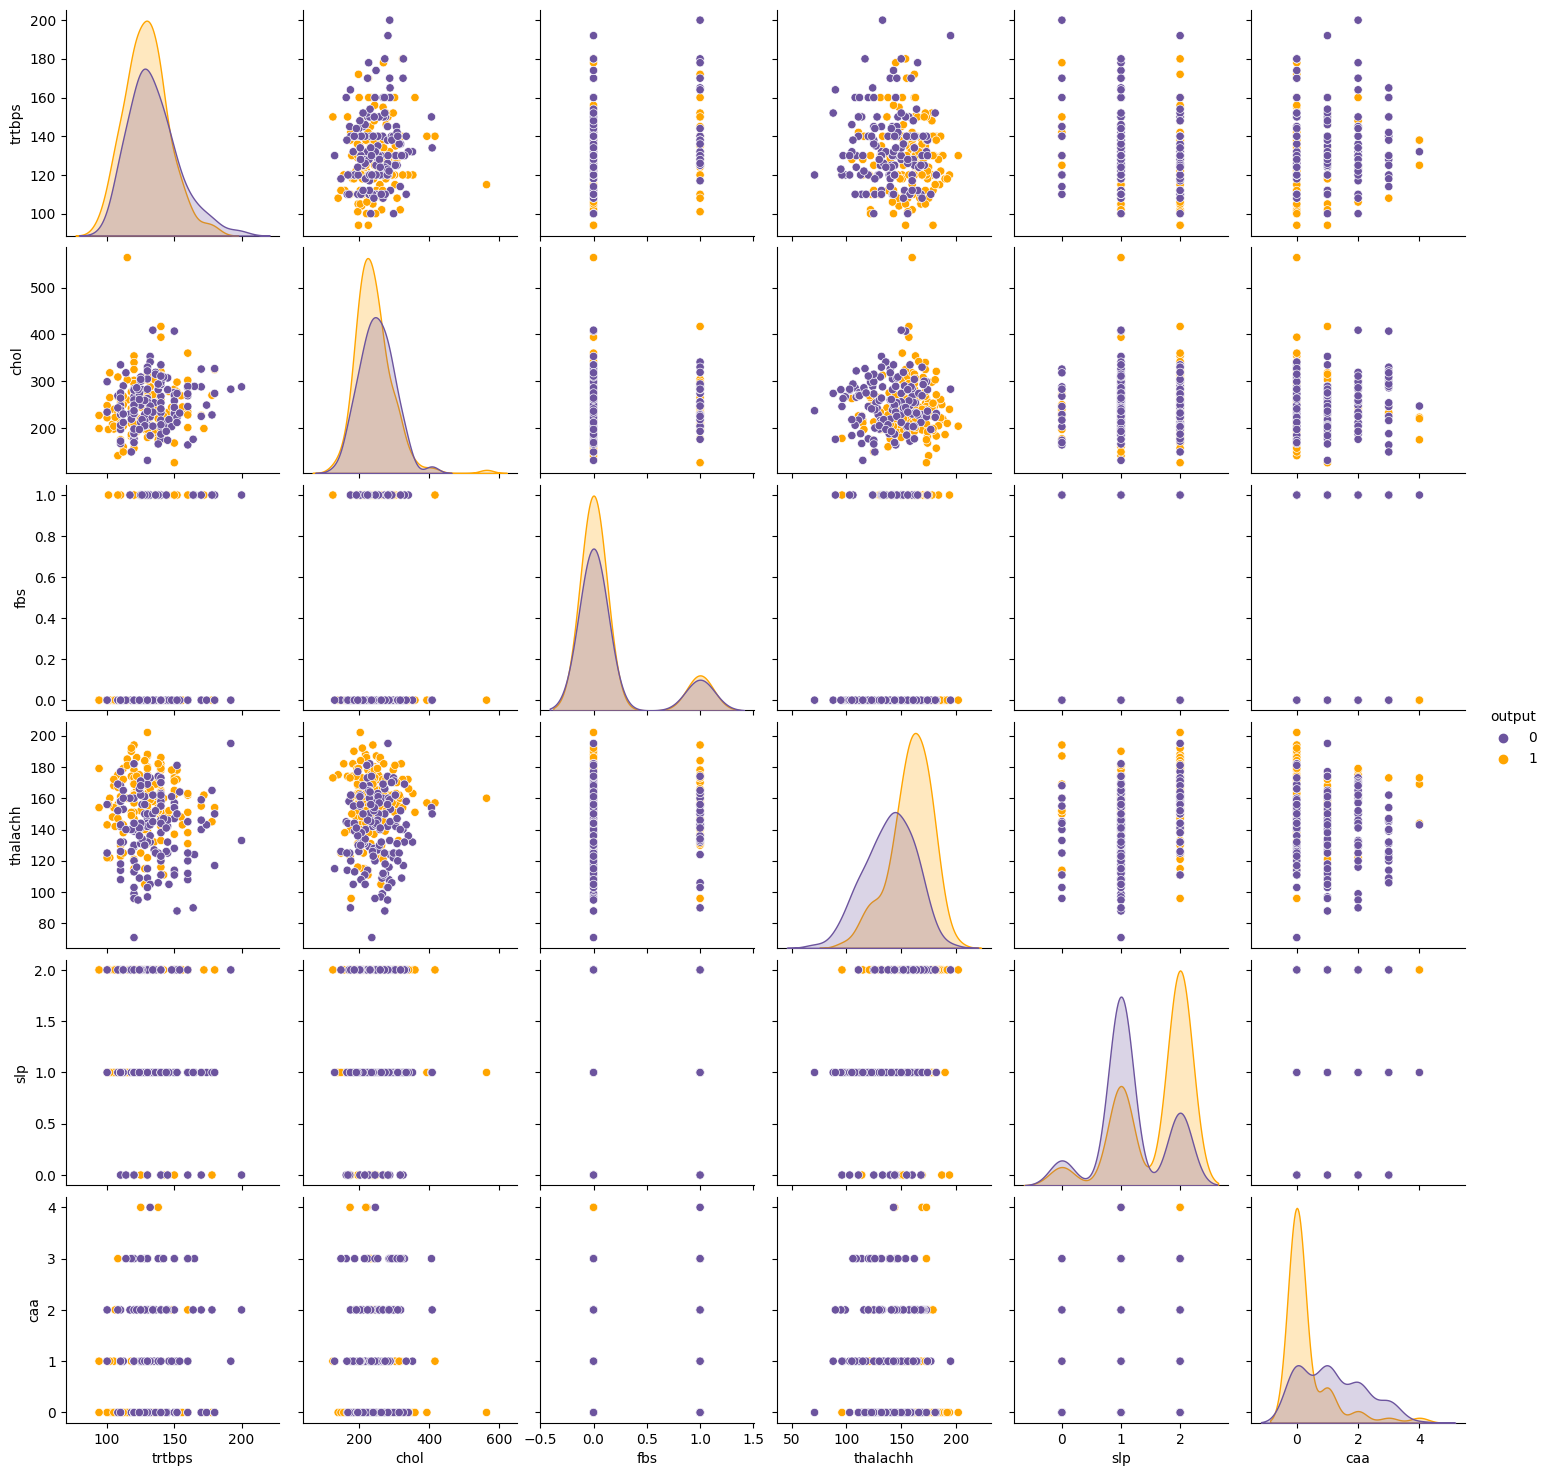

In [35]:
# Create a pairplot using Seaborn with specified variables1
# The 'hue' parameter is set to 'output', which means the 'output' column will be used to color the data points
sns.pairplot(heart[variables2 + ['output']], hue='output', palette={0: custom_colour, 1: 'orange'})

# Show the pairplot
plt.show()

#### Correlation Matrix Heatmap

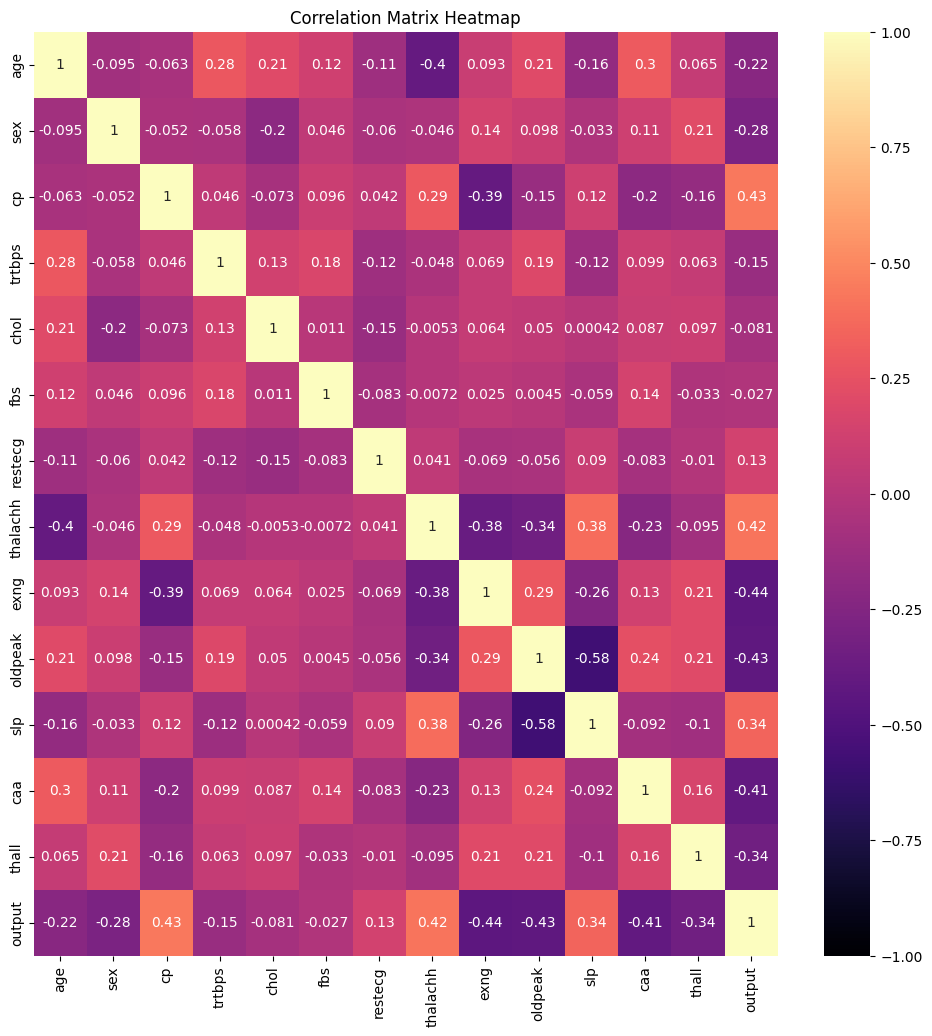

In [36]:
# Calculate the correlation matrix
correlation_matrix = heart.corr()

# Create a mask to hide values outside the range of interest
# mask = (correlation_matrix > 0.3) | (correlation_matrix < -0.3)

# Correlation matrix heatmap with a different color code and annotated values within the specified range
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmax=1, vmin=-1).set_title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


The correlation matrix reveals key associations between various features in the dataset:

- **Age and Maximum Heart Rate (`thalachh`):** A negative correlation of -0.395 suggests that as age increases, the maximum heart rate tends to decrease.

- **Chest Pain Type (`cp`) and Heart Disease (`output`):** There is a positive correlation of 0.432 between chest pain type and the presence of heart disease. Higher chest pain type values are associated with an increased likelihood of heart disease.

- **Exercise-Induced Angina (`exng`) and ST Depression (`oldpeak`):** A negative correlation of -0.436 indicates that the presence of exercise-induced angina is associated with lower ST depression induced by exercise relative to rest.

- **Number of Major Vessels Colored by Fluoroscopy (`caa`) and Heart Disease (`output`):** The correlation of -0.409 suggests that a higher number of major vessels colored by fluoroscopy is associated with a lower likelihood of heart disease.

- **Slope of the Peak Exercise ST Segment (`slp`) and ST Depression (`oldpeak`):** With a negative correlation of -0.576, a steeper slope of the peak exercise ST segment is associated with a lower magnitude of ST depression.

- **Thalassemia (`thall`) and Number of Major Vessels (`caa`):** A negative correlation of -0.343 exists between thalassemia and the number of major vessels colored by fluoroscopy, indicating varying vessel counts across different levels of thalassemia.

These correlation insights provide valuable information for understanding potential relationships between features and guide further exploratory analysis. It's important to note that correlation does not imply causation, and additional analyses may be required for a comprehensive interpretation of the data.


### 4. Feature Selection

After a thorough analysis of the descriptive statistics and exploration of feature relationships within the dataset, a conscious decision has been made to abstain from feature selection for this project. The following considerations underpin this decision:

1. **Independence of Features:** The features exhibit a relative degree of independence, with no discernible strong linear correlation observed in the dataset.

2. **Multicollinearity and Domain Knowledge:** Physiological correlations, such as age and maximum heart rate, hold inherent significance for the classification task. Incorporating these relationships into the model aligns with domain knowledge and the nature of the dataset.

3. **Low Dimensionality:** The dataset maintains a manageable number of features, and the absence of high correlations between features mitigates the risk of multicollinearity.

4. **Noisy Features:** Exploratory Data Analysis (EDA) has revealed that the features included in the dataset are relevant for predicting the outcome, and there are no apparent noisy or irrelevant features.

5. **Model Considerations:** Given the task of predicting heart disease, a deliberate choice has been made to utilize logistic regression and decision tree models. Considering the unique characteristics of the dataset—where features demonstrate relative independence, manageable dimensionality, and no apparent noisy or irrelevant features—extensive feature selection methods are intentionally omitted. The focus remains on leveraging the entirety of available features to enhance the robustness and inclusivity of the predictive models. This approach aligns with the specific requirements and objectives of the project, emphasizing a holistic consideration of features for accurate predictions.

### 5. Model Selection and Training Overview

Consideration of the dataset characteristics, particularly the absence of missing values, has led to a decision to focus on normalization rather than imputation for feature preparation. The aim is to address potential outliers in specific features such as `age`, `cp`, `thall`, `exng`, `oldpeak`, `trtbps`, `chol`, `fbs`, `thalachh`, and `caa`. The following tasks outline the feature transformation and model selection pipeline:

| Task                              | Features                                          | Pipeline                   |
|-----------------------------------|---------------------------------------------------|----------------------------|
| Normalization                     | `age`, `cp`, `thall`, `exng`, `oldpeak`, `trtbps`, `chol`, `fbs`, `thalachh`, `caa` | MinMaxScaler               |
|                                   |                                                   |                            |
| Model Selection Considerations    |                                                   |                            |
|                                   | For non-tree-based algorithms: <br> One-Hot Encode categorical features |                            |
|                                   | For tree-based algorithms: <br> Label Encode categorical/ordinal features |                            |
|                                   |                                                   |                            |
| Training Pipeline                 | All available features                            | 1. Normalize with MinMaxScaler <br> 2. Implement chosen classification algorithm (e.g., Logistic Regression, Decision Tree) |
|                                   |                                                   |                            |
| Evaluation Metrics                |                                                   | Utilize classification metrics (accuracy, precision, recall, F1-score) for model assessment. |



### Split in training and test data

In [38]:
# Display the first few rows of the DataFrame 'df_resized'
heart.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# Extract features and target variable
X = heart.drop(columns=['output'])
y = heart['output']

# Split the data into training and testing sets with stratification
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=heart['output'])


### Dummy Model

In [42]:
# Create a DummyClassifier with a strategy of predicting the most frequent class
dummy_model = DummyClassifier(strategy='most_frequent')

# Fit the DummyClassifier on the feature matrix X and the target variable y
dummy_model.fit(X, y)

# Evaluate the performance of the DummyClassifier by calculating the accuracy on the training data
accuracy = dummy_model.score(X, y)

# Print the accuracy of the DummyClassifier
print("Accuracy of the DummyClassifier:", round(accuracy, 2))


Accuracy of the DummyClassifier: 0.54


The DummyClassifier with a 'most_frequent' strategy achieved an accuracy of 54%, serving as a baseline for evaluating the performance of more advanced models.

### The Model

In [45]:
# Pipeline for normalization
pipeline_normalize = Pipeline([
    ('normalize', MinMaxScaler())  # Normalize values using MinMaxScaler
])

In [61]:
# Define a ColumnTransformer for non-tree-based algorithms
column_transformer_non_tree = ColumnTransformer([
    # Normalization for specified features
    ('normalize_features', pipeline_normalize, ['age', 'cp', 'thall', 'exng', 'oldpeak', 'trtbps', 'chol', 'fbs', 'thalachh', 'caa']),
    
    # One-Hot Encode categorical features
    ('onehot_encode', OneHotEncoder(drop='first'), ['fbs', 'caa', 'cp', 'restecg', 'thall', 'exng', 'sex', 'slp']),
], remainder='passthrough')

# Define a ColumnTransformer for tree-based algorithms
column_transformer_tree = ColumnTransformer([
    # Label Encode categorical features
    ('label_encode', OrdinalEncoder(), ['fbs', 'caa', 'cp', 'restecg', 'thall', 'exng', 'sex', 'slp']),
], remainder='passthrough')

In [63]:
# Define the pipelines for different models
# K-Nearest Neighbors
pipeline_knn = Pipeline([
    ('ct', column_transformer_non_tree),  # Apply the ColumnTransformer for non-tree-based algorithms
    ('model', KNeighborsClassifier(n_neighbors=5))  # K-Nearest Neighbors Classifier with 5 neighbors
])

# Logistic Regression
pipeline_logistic_regression_non_tree = Pipeline([
    ('ct', column_transformer_non_tree),  # Apply the ColumnTransformer for non-tree-based algorithms
    ('model', LogisticRegression())  # Logistic Regression model
])

# Support Vector Machine
pipeline_svm = Pipeline([
    ('ct', column_transformer_non_tree),  # Apply the ColumnTransformer for non-tree-based algorithms
    ('model', SVC(kernel='linear', C=1))  # Linear Support Vector Machine with C=1
])

# Decision Tree
pipeline_decision_tree_tree = Pipeline([
    ('ct', column_transformer_tree),  # Apply the ColumnTransformer for tree-based algorithms
    ('model', DecisionTreeClassifier(max_depth=5))  # Decision Tree Classifier with a maximum depth of 5
])

# Random Forest
pipeline_random_forest = Pipeline([
    ('ct', column_transformer_tree),  # Apply the ColumnTransformer for tree-based algorithms
    ('model', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))  # Random Forest Classifier with 100 trees and max depth of 5
])

# XGBoost
pipeline_xgboost = Pipeline([
    ('ct', column_transformer_tree),  # Apply the ColumnTransformer for tree-based algorithms
    ('model', XGBClassifier(n_estimators=100, max_depth=5, random_state=42))  # XGBoost Classifier with 100 trees and max depth of 5
])


In [64]:
# Train and evaluate each pipeline
# K-Nearest Neighbors
pipeline_knn.fit(Xtrain, ytrain)
accuracy_knn = pipeline_knn.score(Xtest, ytest)
print('K-Nearest Neighbors:', round(accuracy_knn, 2))

# Logistic Regression
pipeline_logistic_regression_non_tree.fit(Xtrain, ytrain)
accuracy_logistic_regression_non_tree = pipeline_logistic_regression_non_tree.score(Xtest, ytest)
print('Logistic Regression:', round(accuracy_logistic_regression_non_tree, 2))

# Support Vector Machine
pipeline_svm.fit(Xtrain, ytrain)
accuracy_svm = pipeline_svm.score(Xtest, ytest)
print('Support Vector Machine:', round(accuracy_svm, 2))

# Decision Tree
pipeline_decision_tree_tree.fit(Xtrain, ytrain)
accuracy_decision_tree_tree = pipeline_decision_tree_tree.score(Xtest, ytest)
print('Decision Tree:', round(accuracy_decision_tree_tree, 2))

# Random Forest
pipeline_random_forest.fit(Xtrain, ytrain)
accuracy_random_forest = pipeline_random_forest.score(Xtest, ytest)
print('Random Forest:', round(accuracy_random_forest, 2))

# XGBoost
pipeline_xgboost.fit(Xtrain, ytrain)
accuracy_xgboost = pipeline_xgboost.score(Xtest, ytest)
print('XGBoost:', round(accuracy_xgboost, 2))


K-Nearest Neighbors: 0.77
Logistic Regression: 0.82
Support Vector Machine: 0.8
Decision Tree: 0.82
Random Forest: 0.8
XGBoost: 0.8


### Hyperparameter search: KNN

In [78]:
# Retrieve the current parameters of the KNN pipeline
pipeline_knn.get_params()


{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'cp', 'thall', 'exng', 'oldpeak',
                                     'trtbps', 'chol', 'fbs', 'thalachh', 'caa']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['fbs', 'caa', 'cp', 'restecg', 'thall',
                                     'exng', 'sex', 'slp'])])),
  ('model', KNeighborsClassifier())],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'cp

In [79]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist = {
    'model__n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors for KNN
    'model__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'model__p': [1, 2],  # Power parameter for the Minkowski metric
}


In [80]:
# Set up a randomized search for hyperparameter tuning

# Create a RandomizedSearchCV object with the KNN pipeline, hyperparameter distributions,
# number of iterations, stratified k-fold cross-validation, and parallelization using 4 CPU cores
random_search_knn = RandomizedSearchCV(
    pipeline_knn,
    param_distributions=param_dist,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=StratifiedKFold(n_splits=5),  # Use stratified k-fold cross-validation for classification
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_knn.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for KNN:", random_search_knn.best_params_)


Best Parameters for KNN: {'model__weights': 'distance', 'model__p': 1, 'model__n_neighbors': 11}


### Hyperparameter search: Logistic regression

In [81]:
# Retrieve the current parameters of the logistic regression pipeline
pipeline_logistic_regression_non_tree.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'cp', 'thall', 'exng', 'oldpeak',
                                     'trtbps', 'chol', 'fbs', 'thalachh', 'caa']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['fbs', 'caa', 'cp', 'restecg', 'thall',
                                     'exng', 'sex', 'slp'])])),
  ('model', LogisticRegression())],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'cp',

In [82]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_logistic_regression = {
    'model__penalty': ['l1', 'l2'],  # Regularization penalty choices for logistic regression
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'model__solver': ['liblinear', 'lbfgs'],  # Solver algorithm choices
    'ct__normalize_features__normalize__feature_range': [(0, 1)],  # Feature range for normalization
}


In [83]:
# Set up a randomized search for hyperparameter tuning of the Logistic regression

# Create a RandomizedSearchCV object with the Logistic Regression pipeline, hyperparameter distributions,
# number of iterations, stratified k-fold cross-validation, and parallelization using 4 CPU cores
random_search_logistic_regression = RandomizedSearchCV(
    pipeline_logistic_regression_non_tree,
    param_distributions=param_dist_logistic_regression,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=StratifiedKFold(n_splits=5),  # Use stratified k-fold cross-validation for classification
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_logistic_regression.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for Logistic Regression:", random_search_logistic_regression.best_params_)


Best Parameters for Logistic Regression: {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__C': 0.1, 'ct__normalize_features__normalize__feature_range': (0, 1)}


### Hyperparameter search: SVM

In [84]:
# Retrieve the current parameters of the KNN pipeline
pipeline_svm.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'cp', 'thall', 'exng', 'oldpeak',
                                     'trtbps', 'chol', 'fbs', 'thalachh', 'caa']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['fbs', 'caa', 'cp', 'restecg', 'thall',
                                     'exng', 'sex', 'slp'])])),
  ('model', SVC(C=1, kernel='linear'))],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 

In [85]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_svm = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'model__kernel': ['linear', 'rbf', 'poly'],  # Kernel choices
    'model__gamma': ['scale', 'auto'],  # Kernel coefficient choices ('scale' uses 1 / (n_features * X.var()) and 'auto' uses 1 / n_features)
    'model__degree': [2, 3, 4, 5],  # Degree of the polynomial kernel
}

In [86]:
# Create a RandomizedSearchCV object with the SVM pipeline, hyperparameter distributions,
# number of iterations, stratified k-fold cross-validation, and parallelization using 1 CPU core
random_search_svm = RandomizedSearchCV(
    pipeline_svm,
    param_distributions=param_dist_svm,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=StratifiedKFold(n_splits=5),  # Use stratified k-fold cross-validation for classification
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_svm.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for SVM:", random_search_svm.best_params_)

Best Parameters for SVM: {'model__kernel': 'linear', 'model__gamma': 'auto', 'model__degree': 2, 'model__C': 0.001}


### Hyperparameter search: Decision tree

In [87]:
# Retrieve the current parameters of the KNN pipeline
pipeline_decision_tree_tree.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('label_encode', OrdinalEncoder(),
                                    ['fbs', 'caa', 'cp', 'restecg', 'thall',
                                     'exng', 'sex', 'slp'])])),
  ('model', DecisionTreeClassifier(max_depth=5))],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('label_encode', OrdinalEncoder(),
                                  ['fbs', 'caa', 'cp', 'restecg', 'thall',
                                   'exng', 'sex', 'slp'])]),
 'model': DecisionTreeClassifier(max_depth=5),
 'ct__n_jobs': None,
 'ct__remainder': 'passthrough',
 'ct__sparse_threshold': 0.3,
 'ct__transformer_weights': None,
 'ct__transformers': [('label_encode',
   OrdinalEncoder(),
   ['fbs', 'caa', 'cp', 'restecg', 'thall', 'exng', 'sex', 'slp'])],
 'ct__verbose': False,
 'ct__verbose_feature_names_out': True,
 'ct__label_encode': OrdinalEn

In [88]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_decision_tree = {
    'model__criterion': ['gini', 'entropy'],  # Split criterion
    'model__max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider for the best split
}

In [89]:
# Create a RandomizedSearchCV object with the Decision Tree pipeline, hyperparameter distributions,
# number of iterations, stratified k-fold cross-validation, and parallelization using 1 CPU core
random_search_decision_tree = RandomizedSearchCV(
    pipeline_decision_tree_tree,
    param_distributions=param_dist_decision_tree,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=StratifiedKFold(n_splits=5),  # Use stratified k-fold cross-validation for classification
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_decision_tree.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for Decision Tree:", random_search_decision_tree.best_params_)

Best Parameters for Decision Tree: {'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__criterion': 'entropy'}


### Hyperparameter search: Random Forest

In [90]:
# Retrieve the current parameters of the Random Forest pipeline
pipeline_random_forest.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('label_encode', OrdinalEncoder(),
                                    ['fbs', 'caa', 'cp', 'restecg', 'thall',
                                     'exng', 'sex', 'slp'])])),
  ('model', RandomForestClassifier(max_depth=5, random_state=42))],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('label_encode', OrdinalEncoder(),
                                  ['fbs', 'caa', 'cp', 'restecg', 'thall',
                                   'exng', 'sex', 'slp'])]),
 'model': RandomForestClassifier(max_depth=5, random_state=42),
 'ct__n_jobs': None,
 'ct__remainder': 'passthrough',
 'ct__sparse_threshold': 0.3,
 'ct__transformer_weights': None,
 'ct__transformers': [('label_encode',
   OrdinalEncoder(),
   ['fbs', 'caa', 'cp', 'restecg', 'thall', 'exng', 'sex', 'slp'])],
 'ct__verbose': False,
 'ct__verbose_feature_names_out': Tr

In [91]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_random_forest = {
    'model__n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'model__criterion': ['gini', 'entropy'],  # Split criterion
    'model__max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider for the best split
}

In [92]:
# Create a RandomizedSearchCV object with the Random Forest pipeline, hyperparameter distributions,
# number of iterations, stratified k-fold cross-validation, and parallelization using 1 CPU core
random_search_random_forest = RandomizedSearchCV(
    pipeline_random_forest,
    param_distributions=param_dist_random_forest,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=StratifiedKFold(n_splits=5),  # Use stratified k-fold cross-validation for classification
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_random_forest.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for Random Forest:", random_search_random_forest.best_params_)

Best Parameters for Random Forest: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 15, 'model__criterion': 'gini'}


### Hyperparameter search: XGBoost

In [93]:
# Retrieve the current parameters of the Random Forest pipeline
pipeline_xgboost.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('label_encode', OrdinalEncoder(),
                                    ['fbs', 'caa', 'cp', 'restecg', 'thall',
                                     'exng', 'sex', 'slp'])])),
  ('model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=5, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estima

In [94]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_xgboost = {
    'model__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Step size shrinkage used in update to prevent overfitting
    'model__n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'model__max_depth': [3, 5, 7, 9],  # Maximum depth of a tree
    'model__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
}

In [95]:
# Create a RandomizedSearchCV object with the XGBoost pipeline, hyperparameter distributions,
# number of iterations, stratified k-fold cross-validation, and parallelization using 1 CPU core
random_search_xgboost = RandomizedSearchCV(
    pipeline_xgboost,
    param_distributions=param_dist_xgboost,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=StratifiedKFold(n_splits=5),  # Use stratified k-fold cross-validation for classification
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_xgboost.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for XGBoost:", random_search_xgboost.best_params_)

Best Parameters for XGBoost: {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.7}


### 6. Model Evaluation

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function for model evaluation
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    return accuracy, precision, recall, f1


In [97]:
# Evaluate KNN
accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_model(random_search_knn.best_estimator_, Xtest, ytest)
print("KNN Evaluation:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}\n")

KNN Evaluation:
Accuracy: 0.79
Precision: 0.75
Recall: 0.91
F1-Score: 0.82



In [98]:
# Evaluate Logistic Regression
accuracy_logistic, precision_logistic, recall_logistic, f1_logistic = evaluate_model(random_search_logistic_regression.best_estimator_, Xtest, ytest)
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print(f"F1-Score: {f1_logistic:.2f}\n")

Logistic Regression Evaluation:
Accuracy: 0.79
Precision: 0.76
Recall: 0.88
F1-Score: 0.82



In [99]:
# Evaluate SVM
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(random_search_svm.best_estimator_, Xtest, ytest)
print("SVM Evaluation:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}\n")

SVM Evaluation:
Accuracy: 0.54
Precision: 0.54
Recall: 1.00
F1-Score: 0.70



In [100]:
# Evaluate Decision Tree
accuracy_dt, precision_dt, recall_dt, f1_dt = evaluate_model(random_search_decision_tree.best_estimator_, Xtest, ytest)
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1-Score: {f1_dt:.2f}\n")

Decision Tree Evaluation:
Accuracy: 0.85
Precision: 0.88
Recall: 0.85
F1-Score: 0.86



In [101]:
# Evaluate Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(random_search_random_forest.best_estimator_, Xtest, ytest)
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}\n")

Random Forest Evaluation:
Accuracy: 0.82
Precision: 0.78
Recall: 0.94
F1-Score: 0.85



In [102]:
# Evaluate XGBoost
accuracy_xgboost, precision_xgboost, recall_xgboost, f1_xgboost = evaluate_model(random_search_xgboost.best_estimator_, Xtest, ytest)
print("XGBoost Evaluation:")
print(f"Accuracy: {accuracy_xgboost:.2f}")
print(f"Precision: {precision_xgboost:.2f}")
print(f"Recall: {recall_xgboost:.2f}")
print(f"F1-Score: {f1_xgboost:.2f}\n")

XGBoost Evaluation:
Accuracy: 0.82
Precision: 0.78
Recall: 0.94
F1-Score: 0.85



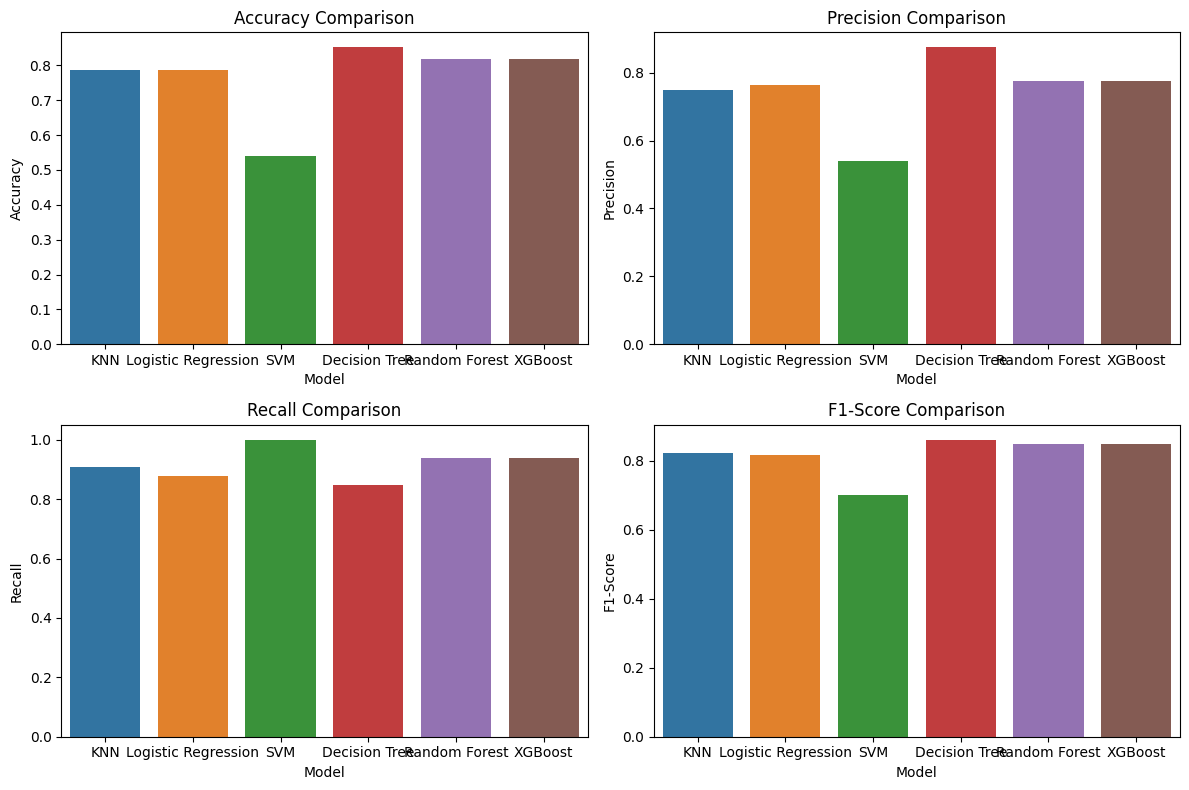

In [103]:
# Store evaluation metrics in a DataFrame
data = {
    'Model': ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_knn, accuracy_logistic, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_xgboost],
    'Precision': [precision_knn, precision_logistic, precision_svm, precision_dt, precision_rf, precision_xgboost],
    'Recall': [recall_knn, recall_logistic, recall_svm, recall_dt, recall_rf, recall_xgboost],
    'F1-Score': [f1_knn, f1_logistic, f1_svm, f1_dt, f1_rf, f1_xgboost]
}

df_metrics = pd.DataFrame(data)

# Plot figures
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df_metrics)
plt.title('Accuracy Comparison')

# Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df_metrics)
plt.title('Precision Comparison')

# Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df_metrics)
plt.title('Recall Comparison')

# F1-Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-Score', data=df_metrics)
plt.title('F1-Score Comparison')

plt.tight_layout()
plt.show()

### Accuracy Comparison

- Logistic Regression, Decision Tree, Random Forest, and XGBoost achieved accuracy around 0.82, outperforming the baseline Dummy Classifier (0.54), K-Nearest Neighbors (0.77), and Support Vector Machine (0.54).
- Decision Tree achieved the highest accuracy (0.85) among all models.

### Precision, Recall, and F1-Score

- Decision Tree demonstrated the best balance between precision, recall, and F1-Score with values of 0.88, 0.85, and 0.86, respectively.
- K-Nearest Neighbors and Logistic Regression also performed well, with F1-Scores of 0.82.
- Support Vector Machine had a lower F1-Score (0.70), indicating a trade-off between precision and recall.

### Conclusion

- Decision Tree stands out as the top-performing model in terms of accuracy, precision, recall, and F1-Score.
- Logistic Regression, Random Forest, and XGBoost also delivered strong performances with balanced metrics.
- K-Nearest Neighbors performed reasonably well but lagged behind the decision tree-based models.
- Support Vector Machine showed a trade-off between precision and recall, potentially indicating sensitivity to the choice of hyperparameters.

In summary, the Decision Tree model appears to be the most suitable for this classification task based on the overall performance across multiple metrics. Consideration should also be given to the specific goals and constraints of the application, as different models may excel in different aspects.


### 8. Feature Importance

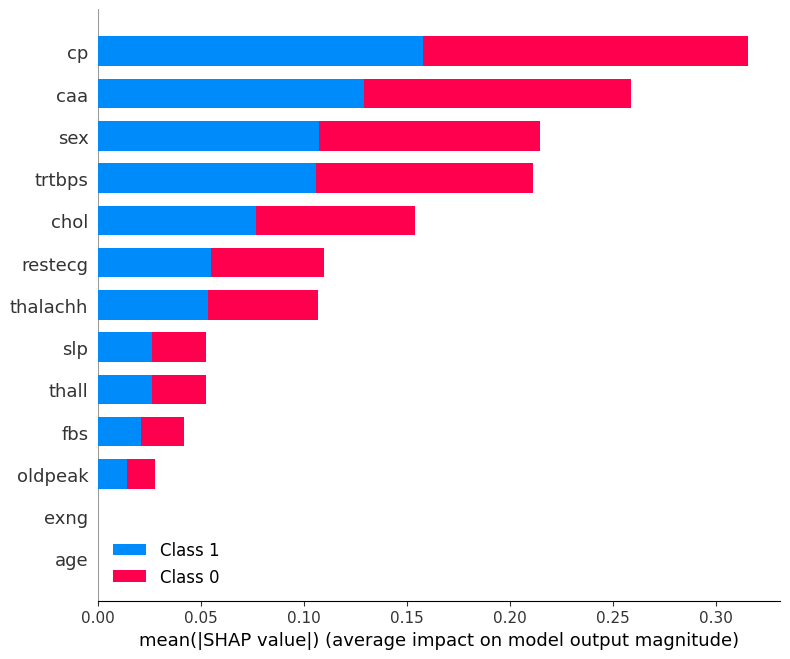

In [129]:
import shap
# 'random_search_decision_tree' is the RandomizedSearchCV object
best_decision_tree_model = random_search_decision_tree.best_estimator_.named_steps['model']

# 'Xtrain' is the training data
shap_values = shap.TreeExplainer(best_decision_tree_model).shap_values(Xtrain)
explainer = shap.TreeExplainer(best_decision_tree_model)

# Create a SHAP plot with features ordered by the max absolute SHAP value
shap.summary_plot(shap_values, features=Xtrain, feature_names=Xtrain.columns, sort=True)

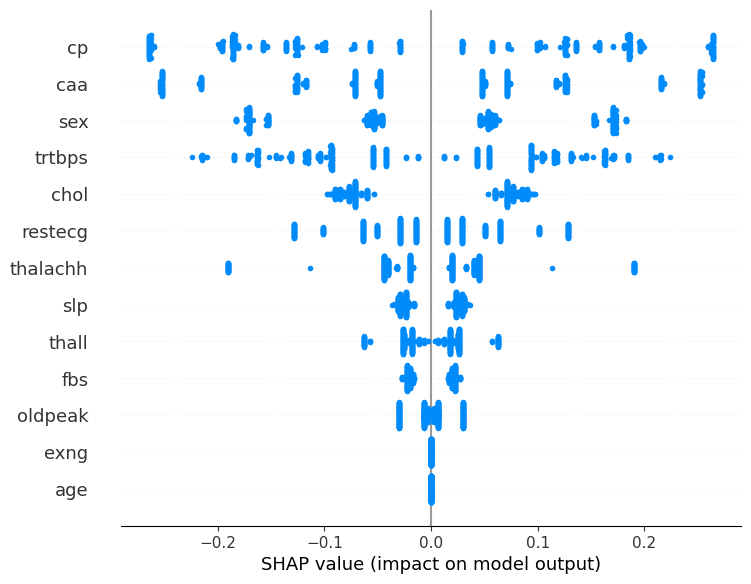

In [139]:
# Assuming shap_values is a list, convert it to a numpy array
shap_values_array = np.vstack(shap_values)

# Assuming Xtrain.columns is a pandas Index, convert it to a list of strings
feature_names = list(Xtrain.columns)

# Convert feature names to strings to avoid TypeError
feature_names = [str(feature) for feature in feature_names]

# Create a shap.Explanation object
shap_values_explanation = shap.Explanation(shap_values_array, feature_names=feature_names)

# Create a beeswarm plot without specifying the order, using feature_names and colors
shap.plots.beeswarm(shap_values_explanation, max_display=20, show=False)
plt.show()

In [130]:
shap_values

[array([[ 0.        , -0.1529331 ,  0.13642431, ..., -0.02525777,
          0.04789325,  0.06312908],
        [ 0.        ,  0.06330539, -0.15398866, ..., -0.03484944,
          0.21574469, -0.00736463],
        [ 0.        , -0.1529331 ,  0.05761831, ..., -0.02525777,
          0.07144793,  0.06312908],
        ...,
        [ 0.        ,  0.17061445,  0.18547609, ..., -0.02343541,
          0.07144793,  0.02663359],
        [ 0.        ,  0.05360854, -0.12530607, ..., -0.02890198,
          0.25183505,  0.01783593],
        [ 0.        ,  0.05360854, -0.12530607, ..., -0.02890198,
          0.25183505,  0.01783593]]),
 array([[ 0.        ,  0.1529331 , -0.13642431, ...,  0.02525777,
         -0.04789325, -0.06312908],
        [ 0.        , -0.06330539,  0.15398866, ...,  0.03484944,
         -0.21574469,  0.00736463],
        [ 0.        ,  0.1529331 , -0.05761831, ...,  0.02525777,
         -0.07144793, -0.06312908],
        ...,
        [ 0.        , -0.17061445, -0.18547609, ...,  

### 9. Conclusion

Project Conclusion: Predictive Modeling for Diabetes

In this project, we explored the relationships among various physiological variables and their impact on predicting diabetes. We utilized logistic regression and decision tree models to predict the likelihood of diabetes based on the available features. Here's a summary of the findings:

Logistic Regression:
- **Strengths:**
  - Achieved a precision of 69% for non-diabetic cases and 57% for diabetic cases.
  - Demonstrated high recall (90%) for non-diabetic cases.
  - Overall accuracy reached 68%.

- **Areas for Improvement:**
  - Lower recall (25%) for diabetic cases.
  - F1-score for diabetic cases was relatively low at 0.35.

Decision Tree:
- **Strengths:**
  - Achieved a balanced precision of 78% for non-diabetic cases and 56% for diabetic cases.
  - Showed a balanced recall of 75% for non-diabetic cases and 60% for diabetic cases.
  - Overall accuracy reached 70%.

- **Areas for Improvement:**
  - F1-score for diabetic cases was moderate at 0.58.

Conclusion:
Both models provided valuable insights into the factors influencing diabetes. The logistic regression model excelled in precision for non-diabetic cases but struggled with recall for diabetic cases. On the other hand, the decision tree model achieved a balanced performance in precision and recall for both classes.